### Análise acadêmica da relação entre COVID-19 e o Saneamento Básico dos Estados Brasileiros

**Autores:**
- Leandro Lopes Bueno
- Matheus Henrique Rothstein Vieira

Fontes de dados:

[Brasil.io - Covid-19](https://brasil.io/api/dataset/covid19/caso/data)

[SNIS - Saneamento Básico](http://www.snis.gov.br/diagnostico-anual-agua-e-esgotos/diagnostico-dos-servicos-de-agua-e-esgotos-2018)

In [49]:
import requests # requisições HTTP
import matplotlib.pyplot as plt # gerar gráficos
import pandas as pd

In [50]:
pd.options.display.max_columns = 120
pd.options.display.max_rows = 90

In [51]:
# Pega dados dos Estados e ordena por casos confirmados
dados = requests.get("https://brasil.io/api/dataset/covid19/caso/data?place_type=state&is_last=true")
dados_por_estado = [{'estado': item['state'], 'casos_por_110k_habitante': item['confirmed_per_100k_inhabitants']} for item in dados.json()['results']]
dados_por_estado = sorted(dados_por_estado, key=lambda i: i['casos_por_110k_habitante'])
estados = [item['estado'] for item in dados_por_estado]
valores = [int(item['casos_por_110k_habitante']) for item in dados_por_estado]

In [52]:
df = pd.read_excel('Planilha_Resumo_Informacoes_Estado_2018.xls', skiprows=range(0, 11)).rename(columns={'-': 'estado', 'GE12a': 'populacao_total', 'AG001': 'populacao_atendida_agua'})
df = df[['estado', 'populacao_total', 'populacao_atendida_agua']]
df['populacao_sem_agua'] = (df['populacao_total'] - df['populacao_atendida_agua']) / df['populacao_total'] * 100
df.loc[df.estado.str.contains('\(([A-Z])\w\)+'), :].sort_values(by='populacao_sem_agua')

/home/leandro/Envs/jupyter/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,estado,populacao_total,populacao_atendida_agua,populacao_sem_agua
32,Distrito Federal (DF),2974703.0,2944955.0,1.000033
24,São Paulo (SP),45270936.0,43547974.0,3.805890
27,Paraná (PR),11260556.0,10628686.0,5.611357
23,Rio de Janeiro (RJ),17078705.0,15449887.0,9.537128
35,Mato Grosso (MT),3121982.0,2787750.0,10.705763
29,Santa Catarina (SC),7032276.0,6263578.0,10.930999
17,Rio Grande do Norte (RN),3408754.0,2968780.0,12.907180
18,Sergipe (SE),2278308.0,1978948.0,13.139576
28,Rio Grande do Sul (RS),11211908.0,9687438.0,13.596883
34,Mato Grosso do Sul (MS),2732639.0,2359872.0,13.641282


/home/leandro/Envs/jupyter/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


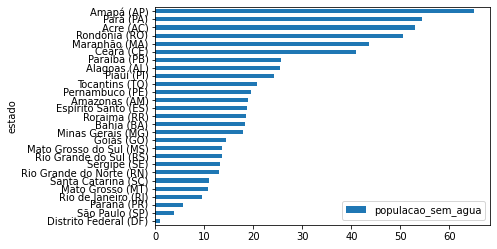

In [53]:
# População relativa sem acesso a água
df.loc[df.estado.str.contains('\(([A-Z])\w\)+'), :].sort_values(by='populacao_sem_agua').plot.barh(x='estado', y='populacao_sem_agua')

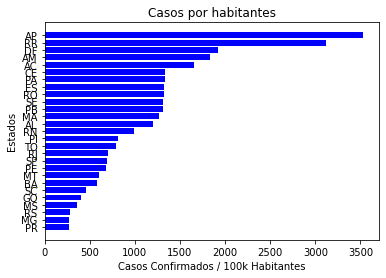

In [54]:
# Gráfico de casos por Estado para cada 100 mil habitantes
x_pos = [i for i, _ in enumerate(estados)]

plt.barh(x_pos, valores, color='blue')
plt.ylabel("Estados")
plt.xlabel("Casos Confirmados / 100k Habitantes")
plt.title("Casos por habitantes")

plt.yticks(x_pos, estados)

plt.show()

### Conclusão

É possível observar uma certa relação entre o nível de saneamento básico e os casos de COVID-19, como, por exemplo, o Amapá país com menor população relativa com acesso à água tratada e que lidera nos números de COVID-19 com base na população relativa.

Outro bom exemplo é o Paraná, país com menos casos relativos e com um bom nível de entrega de água tratada para a população.

Mas essa relação nem sempre é verdade, como pode ser observado no DF.

Isso deve ocorrer, pois acesso à água  é um bom inidicador do nível de desenvolvimento de um local.

Logo é possível afirmar que locais com nível baixo de saneamento necessariamente são locais com maior taxa de COVID-19, mas o oposto não é verdade, pois existem mais fatores associados à COVID-19.